## <font size=5> <strong>Heart Disease Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#condition
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
dataset["target"].unique()

array([1, 0])

### Correlation between columns

In [10]:
print(dataset.corr()["target"].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


## Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
predictors = dataset.drop("target",axis=1)

predictors_processed = preprocessor.fit_transform(predictors)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
dataset.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
dataset.isna().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


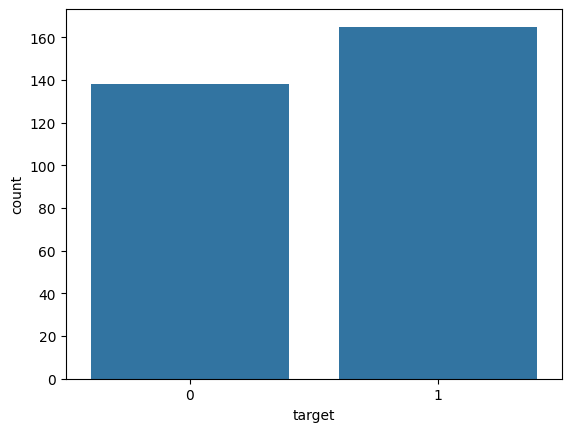

In [14]:
y = dataset["target"]

sns.countplot(x = y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [16]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='count'>

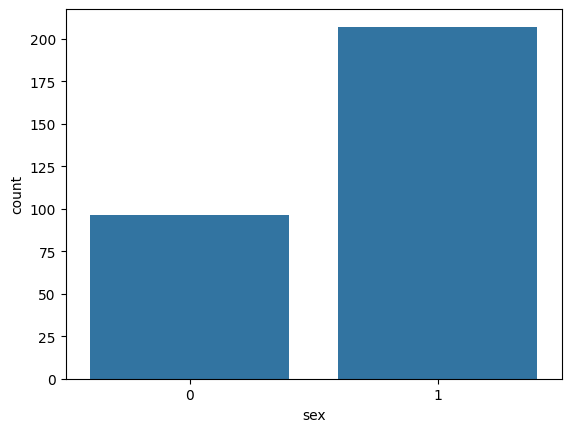

In [17]:
sns.countplot(x = dataset["sex"])

### Analysing the Chest Pain Type feature

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='count'>

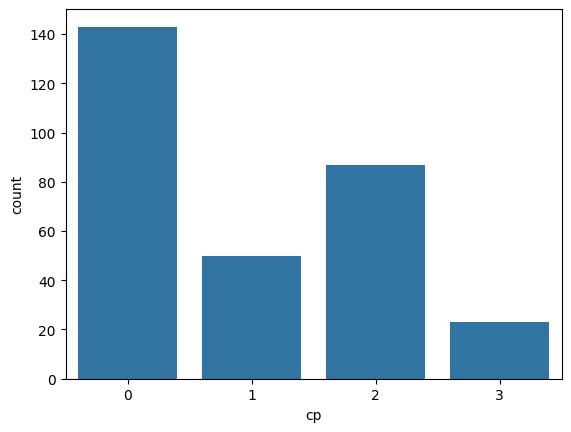

In [19]:
sns.countplot(x=dataset["cp"])

### Analysing the Fasting Blood Sugar feature

In [20]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [21]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='count'>

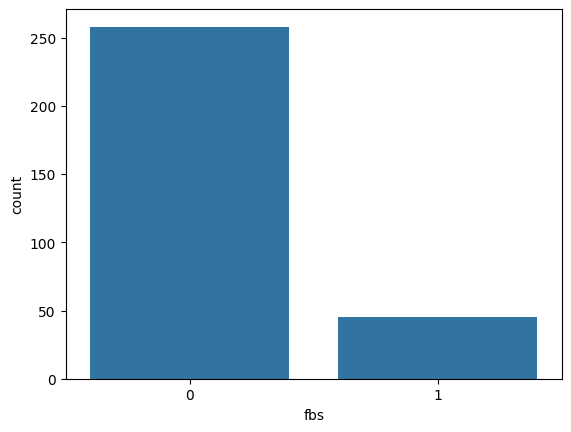

In [22]:
sns.countplot(x = dataset["fbs"])

### Analysing the resting electrocardiographic feature

In [23]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='count'>

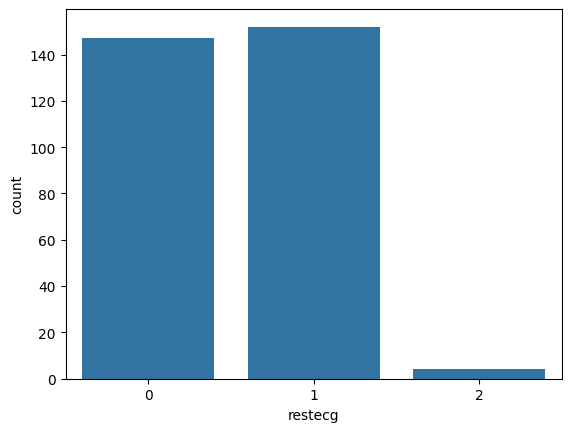

In [24]:
sns.countplot(x = dataset["restecg"])

### Analysing the exercise induced angina feature

In [25]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='count'>

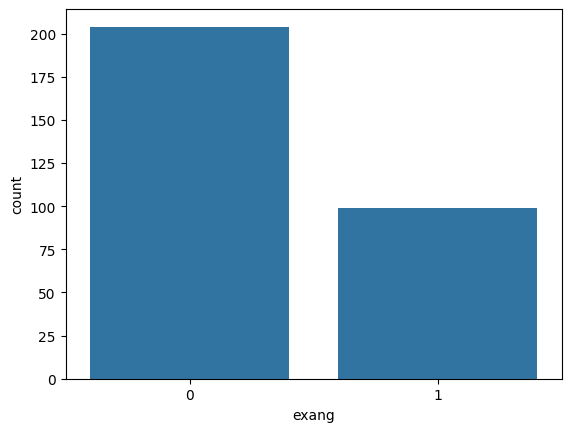

In [26]:
sns.countplot(x  = dataset["exang"])

### Analysing the Slope feature

In [27]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='count'>

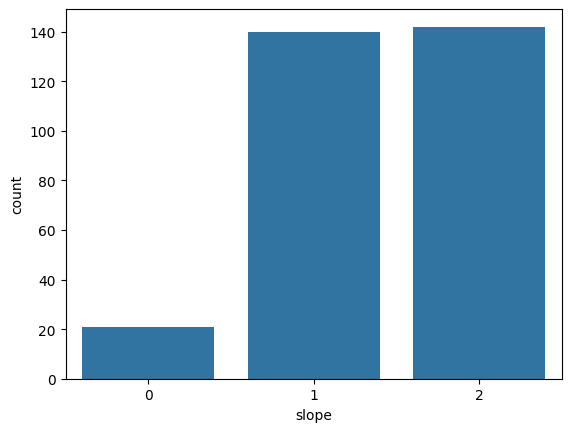

In [28]:
sns.countplot(x = dataset["slope"])

### Analysing the number of major vessels (0-3) feature

In [29]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='count'>

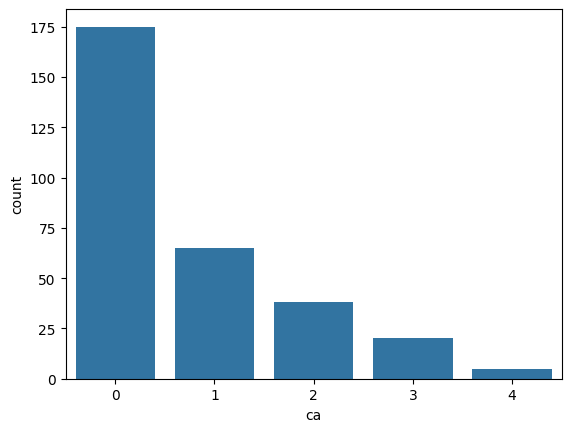

In [30]:
sns.countplot(x = dataset["ca"])

##### ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [31]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='count'>

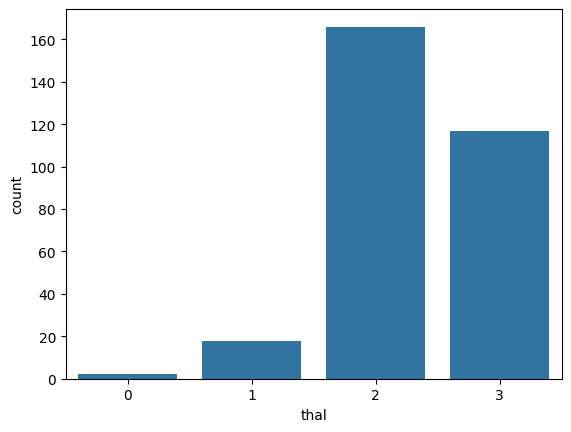

In [32]:
sns.countplot( x = dataset["thal"])

<Axes: xlabel='thal', ylabel='Count'>

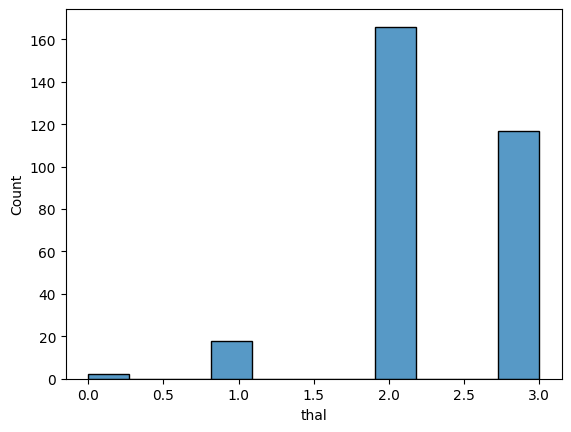

In [33]:
sns.histplot(dataset["thal"])

## IV. Train Test split

In [34]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20)

In [35]:
X_train.shape

(242, 13)

In [36]:
X_test.shape

(61, 13)

In [37]:
Y_train.shape

(242,)

In [38]:
Y_test.shape

(61,)

## V. Model Fitting

In [39]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
Y_pred_lr.shape

(61,)

In [42]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [44]:
Y_pred_nb.shape

(61,)

In [45]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.97 %


### SVM

In [46]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [47]:
Y_pred_svm.shape

(61,)

In [48]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 88.52 %


### K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [50]:
Y_pred_knn.shape


(61,)

In [51]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 63.93 %


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [53]:
print(Y_pred_dt.shape)

(61,)


In [54]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 93.44 %


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [56]:
Y_pred_rf.shape

(61,)

In [57]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


## VI. final

In [58]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %
The accuracy score achieved using Naive Bayes is: 81.97 %
The accuracy score achieved using Support Vector Machine is: 88.52 %
The accuracy score achieved using K-Nearest Neighbors is: 63.93 %
The accuracy score achieved using Decision Tree is: 93.44 %
The accuracy score achieved using Random Forest is: 95.08 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

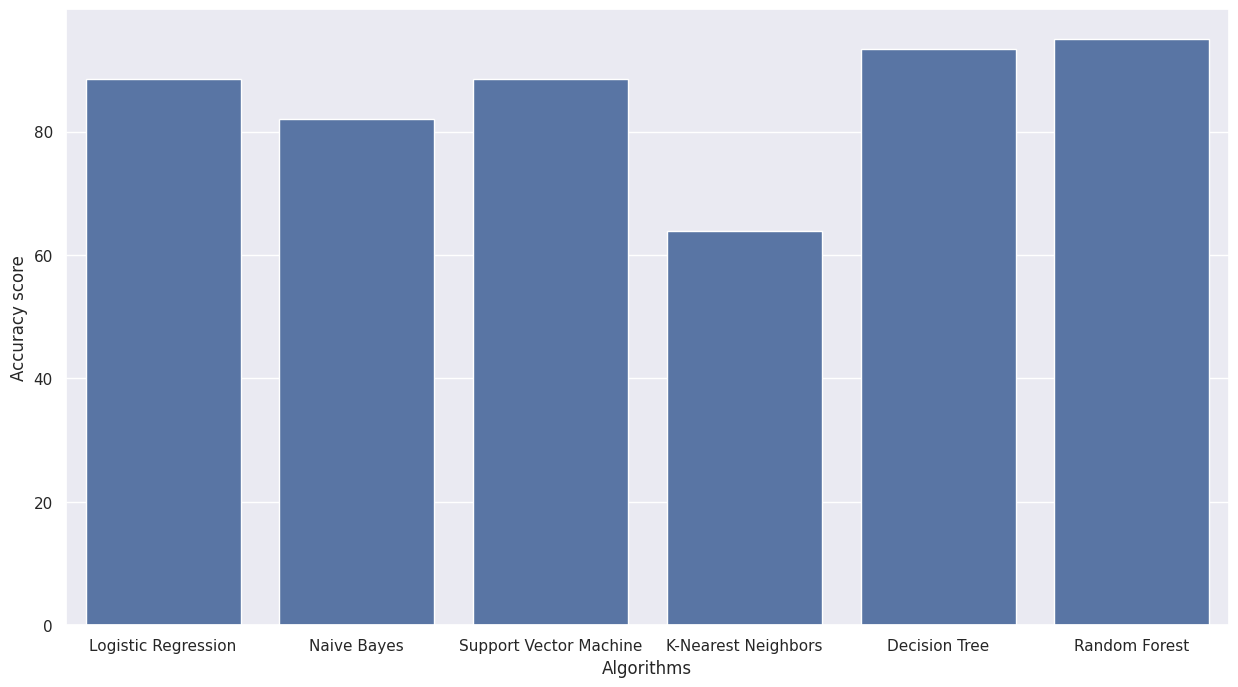

In [59]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms, y = scores)

# Testing


## Logistic  Regression

In [60]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
score_lr = round(accuracy_score(Y_test, Y_pred_lr) * 100, 2)
print("The accuracy score achieved using Logistic Regression is: " + str(score_lr) + " %")

cm = confusion_matrix(Y_test, Y_pred_lr)
print("Confusion Matrix:\n", cm)

precision = precision_score(Y_test, Y_pred_lr)
print("Precision: {:.2f}".format(precision))

recall = recall_score(Y_test, Y_pred_lr)
print("Recall: {:.2f}".format(recall))

f1 = f1_score(Y_test, Y_pred_lr)
print("F1 Score: {:.2f}".format(f1))

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))


The accuracy score achieved using Logistic Regression is: 88.52 %
Confusion Matrix:
 [[28  5]
 [ 2 26]]
Precision: 0.84
Recall: 0.93
F1 Score: 0.88
Specificity: 0.85


## Naive Bayes

In [61]:


score_nb = round(accuracy_score(Y_test, Y_pred_nb) * 100, 2)
print("The accuracy score achieved using Naive Bayes is: " + str(score_nb) + " %")

cm_nb = confusion_matrix(Y_test, Y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", cm_nb)

precision_nb = precision_score(Y_test, Y_pred_nb)
print("Precision for Naive Bayes: {:.2f}".format(precision_nb))

recall_nb = recall_score(Y_test, Y_pred_nb)
print("Recall for Naive Bayes: {:.2f}".format(recall_nb))

f1_nb = f1_score(Y_test, Y_pred_nb)
print("F1 Score for Naive Bayes: {:.2f}".format(f1_nb))

tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()
specificity_nb = tn_nb / (tn_nb + fp_nb)
print("Specificity for Naive Bayes: {:.2f}".format(specificity_nb))


The accuracy score achieved using Naive Bayes is: 81.97 %
Confusion Matrix for Naive Bayes:
 [[26  7]
 [ 4 24]]
Precision for Naive Bayes: 0.77
Recall for Naive Bayes: 0.86
F1 Score for Naive Bayes: 0.81
Specificity for Naive Bayes: 0.79


##  SVM

In [62]:

score_svm = round(accuracy_score(Y_test, Y_pred_svm) * 100, 2)
print("The accuracy score achieved using SVM is: " + str(score_svm) + " %")

cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix for SVM:\n", cm_svm)

precision_svm = precision_score(Y_test, Y_pred_svm)
print("Precision for SVM: {:.2f}".format(precision_svm))

recall_svm = recall_score(Y_test, Y_pred_svm)
print("Recall for SVM: {:.2f}".format(recall_svm))

f1_svm = f1_score(Y_test, Y_pred_svm)
print("F1 Score for SVM: {:.2f}".format(f1_svm))

tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
specificity_svm = tn_svm / (tn_svm + fp_svm)
print("Specificity for SVM: {:.2f}".format(specificity_svm))


The accuracy score achieved using SVM is: 88.52 %
Confusion Matrix for SVM:
 [[28  5]
 [ 2 26]]
Precision for SVM: 0.84
Recall for SVM: 0.93
F1 Score for SVM: 0.88
Specificity for SVM: 0.85


In [63]:

score_knn = round(accuracy_score(Y_test, Y_pred_knn) * 100, 2)
print("The accuracy score achieved using KNN is: " + str(score_knn) + " %")

cm_knn = confusion_matrix(Y_test, Y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

precision_knn = precision_score(Y_test, Y_pred_knn)
print("Precision for KNN: {:.2f}".format(precision_knn))

recall_knn = recall_score(Y_test, Y_pred_knn)
print("Recall for KNN: {:.2f}".format(recall_knn))

f1_knn = f1_score(Y_test, Y_pred_knn)
print("F1 Score for KNN: {:.2f}".format(f1_knn))

tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
specificity_knn = tn_knn / (tn_knn + fp_knn)
print("Specificity for KNN: {:.2f}".format(specificity_knn))


The accuracy score achieved using KNN is: 63.93 %
Confusion Matrix for KNN:
 [[18 15]
 [ 7 21]]
Precision for KNN: 0.58
Recall for KNN: 0.75
F1 Score for KNN: 0.66
Specificity for KNN: 0.55


## Decision Tree

In [64]:

score_dt = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)
print("The accuracy score achieved using Decision Tree is: " + str(score_dt) + " %")

cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", cm_dt)

precision_dt = precision_score(Y_test, Y_pred_dt)
print("Precision for Decision Tree: {:.2f}".format(precision_dt))

recall_dt = recall_score(Y_test, Y_pred_dt)
print("Recall for Decision Tree: {:.2f}".format(recall_dt))

f1_dt = f1_score(Y_test, Y_pred_dt)
print("F1 Score for Decision Tree: {:.2f}".format(f1_dt))

tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt)
print("Specificity for Decision Tree: {:.2f}".format(specificity_dt))


The accuracy score achieved using Decision Tree is: 93.44 %
Confusion Matrix for Decision Tree:
 [[31  2]
 [ 2 26]]
Precision for Decision Tree: 0.93
Recall for Decision Tree: 0.93
F1 Score for Decision Tree: 0.93
Specificity for Decision Tree: 0.94


##  Random Forest

In [65]:

score_rf = round(accuracy_score(Y_test, Y_pred_rf) * 100, 2)
print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")

cm_rf = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

precision_rf = precision_score(Y_test, Y_pred_rf)
print("Precision for Random Forest: {:.2f}".format(precision_rf))

recall_rf = recall_score(Y_test, Y_pred_rf)
print("Recall for Random Forest: {:.2f}".format(recall_rf))

f1_rf = f1_score(Y_test, Y_pred_rf)
print("F1 Score for Random Forest: {:.2f}".format(f1_rf))

tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf)
print("Specificity for Random Forest: {:.2f}".format(specificity_rf))


The accuracy score achieved using Random Forest is: 95.08 %
Confusion Matrix for Random Forest:
 [[31  2]
 [ 1 27]]
Precision for Random Forest: 0.93
Recall for Random Forest: 0.96
F1 Score for Random Forest: 0.95
Specificity for Random Forest: 0.94


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

models = ["Logistic Regression", "Naive Bayes", "SVM", "KNN", "Decision Tree", "Random Forest"]

results = []

Y_pred_models = [Y_pred_lr, Y_pred_nb, Y_pred_svm, Y_pred_knn, Y_pred_dt, Y_pred_rf]

for model, Y_pred in zip(models, Y_pred_models):
    accuracy = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    cm = confusion_matrix(Y_test, Y_pred)
    precision = round(precision_score(Y_test, Y_pred), 2)
    recall = round(recall_score(Y_test, Y_pred), 2)
    f1 = round(f1_score(Y_test, Y_pred), 2)


    tn, fp, fn, tp = cm.ravel()
    specificity = round(tn / (tn + fp), 2)

    results.append([model, accuracy, precision, recall, f1, specificity])


metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"])

print(metrics_df)


                 Model  Accuracy  Precision  Recall  F1 Score  Specificity
0  Logistic Regression     88.52       0.84    0.93      0.88         0.85
1          Naive Bayes     81.97       0.77    0.86      0.81         0.79
2                  SVM     88.52       0.84    0.93      0.88         0.85
3                  KNN     63.93       0.58    0.75      0.66         0.55
4        Decision Tree     93.44       0.93    0.93      0.93         0.94
5        Random Forest     95.08       0.93    0.96      0.95         0.94


## Accuracy


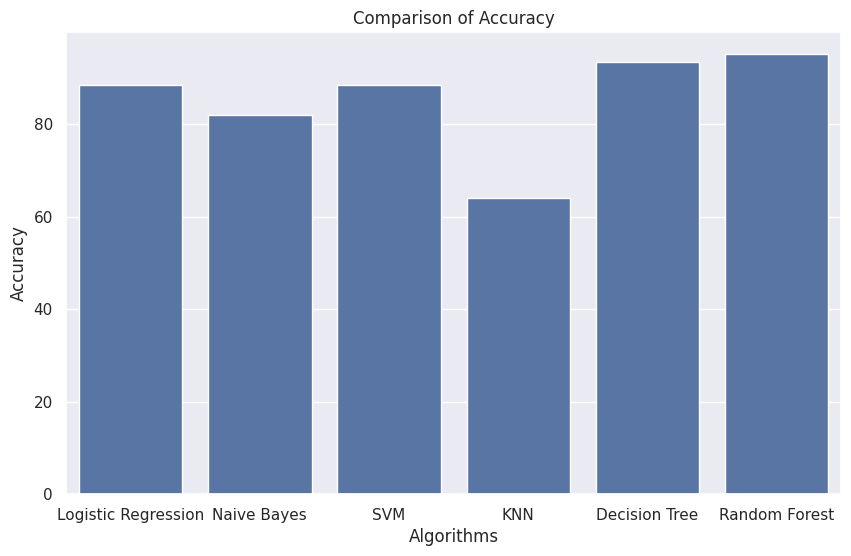

In [67]:

metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]


sns.set(rc={'figure.figsize':(10,6)})

plt.figure()
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.show()


## Precision

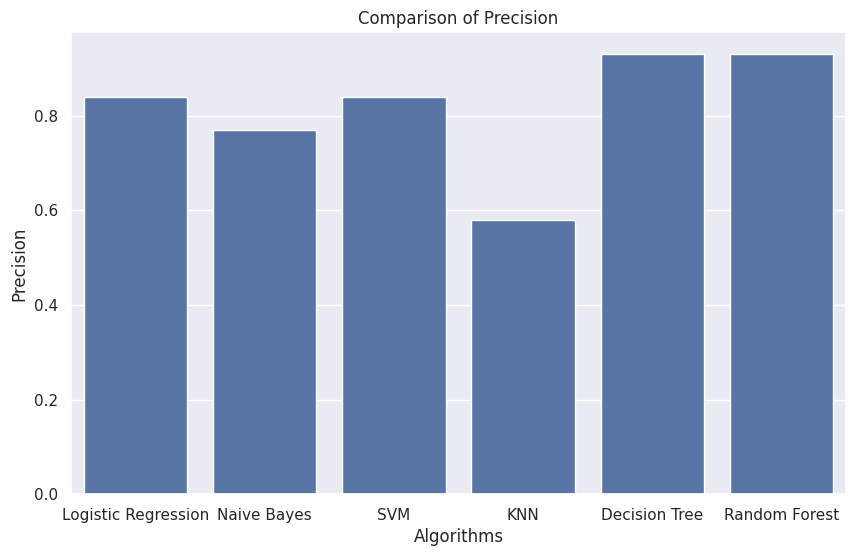

In [68]:

plt.figure()
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Comparison of Precision')
plt.show()


## Recall


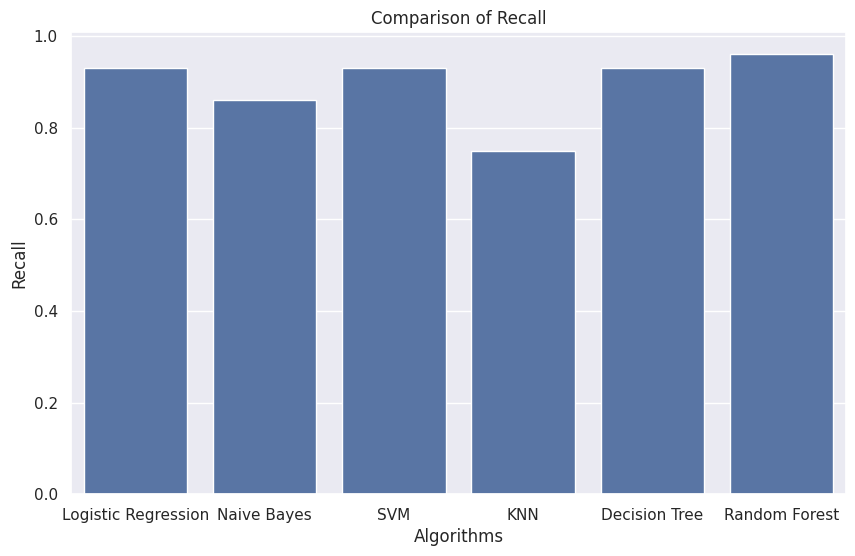

In [69]:


plt.figure()
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.title('Comparison of Recall')
plt.show()



## F1 Score

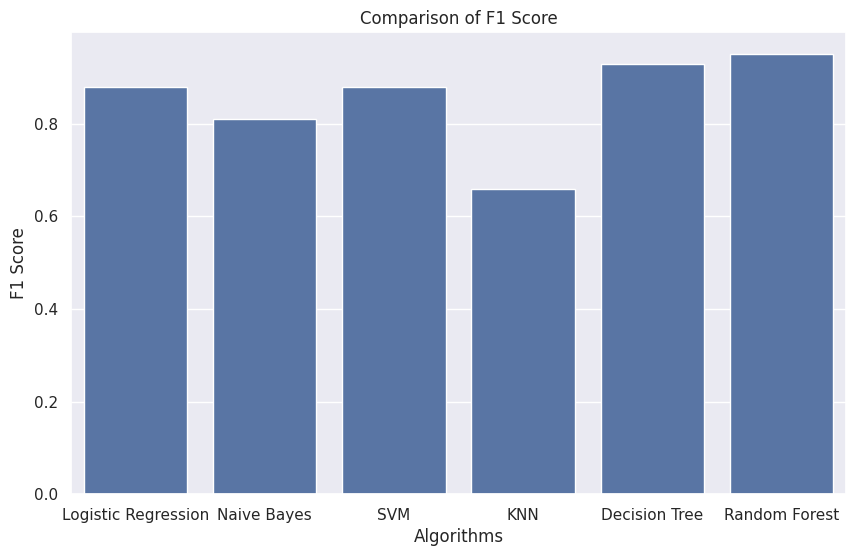

In [70]:

plt.figure()
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score')
plt.show()



## Specificity


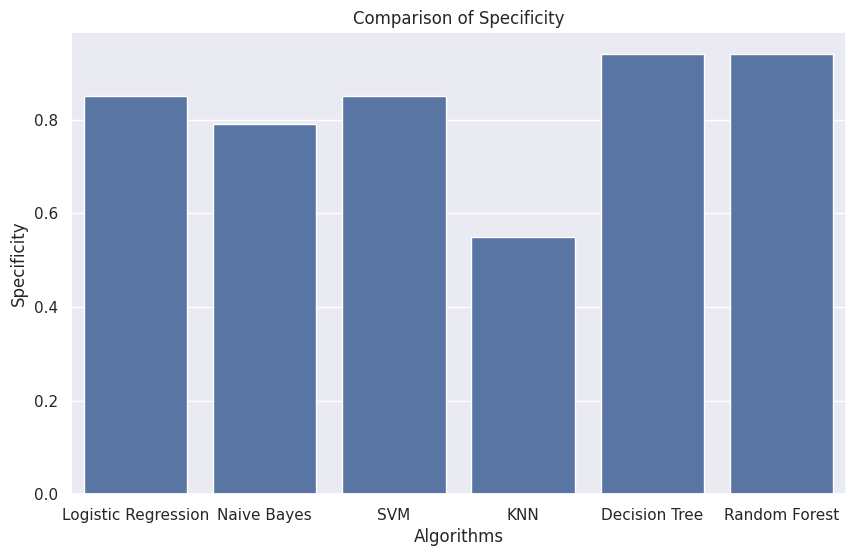

In [71]:

plt.figure()
sns.barplot(x='Model', y='Specificity', data=metrics_df)
plt.xlabel('Algorithms')
plt.ylabel('Specificity')
plt.title('Comparison of Specificity')
plt.show()

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression              83.47          88.52
1          Naive Bayes              82.23          81.97
2                  SVM              84.71          88.52
3                  KNN              73.55          63.93
4        Decision Tree             100.00          93.44
5        Random Forest             100.00          95.08


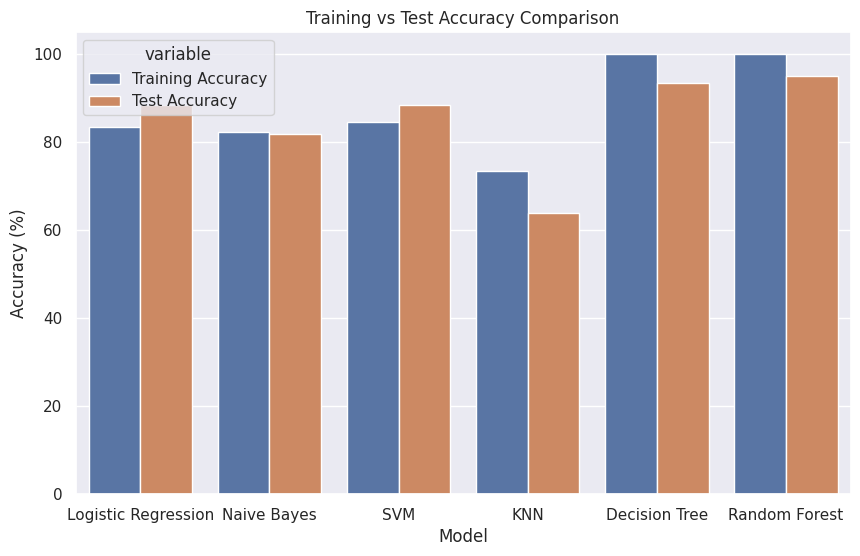

In [72]:
from sklearn.metrics import accuracy_score

models = [
    ("Logistic Regression", lr),
    ("Naive Bayes", nb),
    ("SVM", sv),
    ("KNN", knn),
    ("Decision Tree", dt),
    ("Random Forest", rf),
]


train_accuracies = []
test_accuracies = []



for name, model in models:
    # Training
    Y_train_pred = model.predict(X_train)
    train_accuracy = round(accuracy_score(Y_train, Y_train_pred) * 100, 2)
    train_accuracies.append(train_accuracy)

    # Test
    Y_test_pred = model.predict(X_test)
    test_accuracy = round(accuracy_score(Y_test, Y_test_pred) * 100, 2)
    test_accuracies.append(test_accuracy)

model_names = []
for name, _ in models:
    model_names.append(name)

accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print(accuracy_df)


plt.figure()
sns.barplot(x='Model', y='value', hue='variable',
            data=pd.melt(accuracy_df, id_vars=['Model'], value_vars=['Training Accuracy', 'Test Accuracy']))
plt.title('Training vs Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()


In [ ]:
import pandas as pd

print("Please provide the following values:")

age = int(input("Enter age : "))
sex = int(input("Enter sex (1 = male, 0 = female): "))
cp = int(input("Enter chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic): "))
trestbps = int(input("Enter resting blood pressure in mm Hg (Ideal range: 94-200): "))
chol = int(input("Enter serum cholesterol in mg/dL (Ideal range: 126-564): "))
fbs = int(input("Is fasting blood sugar > 120 mg/dL? (1 = yes, 0 = no): "))
restecg = int(input("Enter resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy): "))
thalach = int(input("Enter maximum heart rate achieved (Ideal range: 71-202): "))
exang = int(input("Enter exercise-induced angina (1 = yes, 0 = no): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest (Ideal range: 0.0-6.2): "))
slope = int(input("Enter the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia type (1 = normal, 2 = fixed defect, 3 = reversible defect): "))


custom_data = {
    'age': age,
    'sex': sex,
    'cp': cp,
    'trestbps': trestbps,
    'chol': chol,
    'fbs': fbs,
    'restecg': restecg,
    'thalach': thalach,
    'exang': exang,
    'oldpeak': oldpeak,
    'slope': slope,
    'ca': ca,
    'thal': thal
}

custom_df = pd.DataFrame([custom_data])

custom_prediction = rf.predict(custom_df)
custom_probability = rf.predict_proba(custom_df)[:, 1]

print(f"\nYou Have : {'High Chance of Heart Disease' if custom_probability[0] > 0.5 else 'Low Chance of Heart Disease'}")
print(f"Probability of Heart Disease: {custom_probability[0] * 100:.2f}%")

Please provide the following values:
Enter age : 55
Enter sex (1 = male, 0 = female): 1
Enter chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic): 2
Enter resting blood pressure in mm Hg (Ideal range: 94-200): 100
Enter serum cholesterol in mg/dL (Ideal range: 126-564): 120
Is fasting blood sugar > 120 mg/dL? (1 = yes, 0 = no): 1
Enter resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy): 2
Enter maximum heart rate achieved (Ideal range: 71-202): 80
Enter exercise-induced angina (1 = yes, 0 = no): 1
Enter ST depression induced by exercise relative to rest (Ideal range: 0.0-6.2): 0
Enter the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping): 1
Enter number of major vessels (0-3) colored by fluoroscopy: 0
Enter thalassemia type (1 = normal, 2 = fixed defect, 3 = reversible defect): 1

You Have : Low Chance of Heart Disease
Probability of Heart Disease: 48

In [73]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)